In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score,r2_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  

In [4]:
# load the dataset 
dataset=pd.read_csv("D:\ML\ML Assignment\Food_Delivery_Time_Prediction.csv")
df=pd.DataFrame(dataset)

# Handle values
print(df.head())
print(df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())
print(df[df['Distance'] <= 0])   # distance can't be zero or negative

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

  Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0              Rainy             Medium                           4   
1             Cloudy             Medium                           8   
2              Snowy             Medium                           9   
3             Cloudy                Low                           2   
4              Rainy               High                           6   

  Order_Priority Order_Time Vehicle_Type  Restaurant_Rating  Customer_Rating  \
0         Medium  Afternoon          Car                4.1 

In [5]:
# Encode categorical
data=df[['Order_ID',
'Customer_Location',
'Restaurant_Location',
'Weather_Conditions',
'Traffic_Conditions',
'Order_Priority',
'Order_Time',
'Vehicle_Type']]

le=LabelEncoder()

for col in data:
    df[col] = le.fit_transform(df[col])

print(df[data.columns])

     Order_ID  Customer_Location  Restaurant_Location  Weather_Conditions  \
0           0                 98                   10                   1   
1           1                 73                   50                   0   
2           2                 79                  163                   2   
3           3                160                  107                   0   
4           4                 65                   71                   1   
..        ...                ...                  ...                 ...   
195       195                117                  133                   0   
196       196                189                  106                   2   
197       197                 58                   32                   2   
198       198                  1                  153                   1   
199       199                141                  181                   2   

     Traffic_Conditions  Order_Priority  Order_Time  Vehicle_Type  
0      

In [6]:
#Normalize 
scaler=StandardScaler()
df[['Distance', 'Delivery_Time']] = scaler.fit_transform(df[['Distance', 'Delivery_Time']])
print(df['Distance'])

0     -1.454738
1      1.439192
2     -0.666417
3      0.335835
4     -0.700119
         ...   
195    1.805512
196   -0.792431
197    1.335157
198    1.840679
199   -0.339659
Name: Distance, Length: 200, dtype: float64


In [7]:
# Feature Engineering:
print(df.columns)
median_time=df['Delivery_Time'].median()
print(median_time)
df['delivery_status']=df['Delivery_Time'].apply(lambda x:1 if x> median_time else 0)



Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')
0.07662482028384994


In [8]:
print(df.info)
print(df.columns)
x=df[['Delivery_Time']]
y=df['delivery_status']# target

<bound method DataFrame.info of      Order_ID  Customer_Location  Restaurant_Location  Distance  \
0           0                 98                   10 -1.454738   
1           1                 73                   50  1.439192   
2           2                 79                  163 -0.666417   
3           3                160                  107  0.335835   
4           4                 65                   71 -0.700119   
..        ...                ...                  ...       ...   
195       195                117                  133  1.805512   
196       196                189                  106 -0.792431   
197       197                 58                   32  1.335157   
198       198                  1                  153  1.840679   
199       199                141                  181 -0.339659   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1            

In [60]:
# naive bayes

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model=GaussianNB()
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc=accuracy_score(y_test,y_pred)

print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("Recall_score:",recall_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print(acc) 



confusion_matrix: [[19  0]
 [ 1 20]]
Recall_score: 0.9523809523809523
precision: 1.0
0.975


In [59]:
#K-Nearest Neighbors (KNN):

print(df.columns)
a=df[["Distance"]]
b=df[["delivery_status"]]

X_train,X_test,Y_train,Y_test=train_test_split(a,b,test_size=0.3,random_state=42)

Model=KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train,Y_train)
pred=Model.predict(X_test)
ac=accuracy_score(Y_test,pred)
print("confusion_matrix:",confusion_matrix(Y_test,pred))
print("Recall_score:",recall_score(Y_test,pred))
print("precision:",precision_score(Y_test,pred))
f1=f1_score(Y_test,pred)

print("F1_score:",f1)


Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'delivery_status'],
      dtype='object')
confusion_matrix: [[21  7]
 [20 12]]
Recall_score: 0.375
precision: 0.631578947368421
F1_score: 0.47058823529411764


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


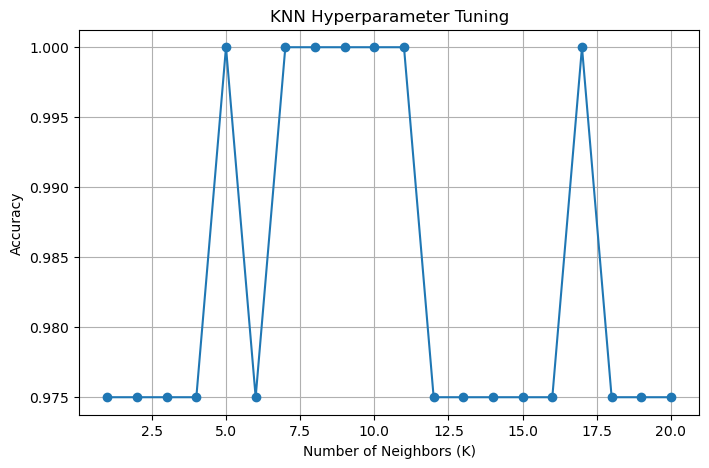

In [11]:
k_values = range(1, 21)
accuracies = []

# Train and evaluate KNN for each K
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [57]:
print(df.columns)


features=df[["Distance"]]
Target=df[["delivery_status"]]
print(df["delivery_status"])
#Decision Tree:
a_train,a_test,b_train,b_test=train_test_split(features,Target,test_size=0.2)


Dtmodel=DecisionTreeClassifier(random_state=42)
Dtmodel.fit(a_train,b_train)
Result=Dtmodel.predict(a_test)

f1=f1_score(b_test,Result)
accc=accuracy_score(b_test,Result)
print("Recall_score:",recall_score(b_test,Result))
print("precision:",precision_score(b_test,Result))
print("F1_score:",f1)
print("Accuracy:",accc)
print("confusion_matrix:",confusion_matrix(b_test,Result))

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'delivery_status'],
      dtype='object')
0      0
1      0
2      0
3      1
4      0
      ..
195    0
196    1
197    1
198    0
199    1
Name: delivery_status, Length: 200, dtype: int64
200
200
Recall_score: 0.56
precision: 0.6666666666666666
F1_score: 0.6086956521739131
Accuracy: 0.55
confusion_matrix: [[ 8  7]
 [11 14]]


In [62]:
#Phase 3: Reporting and Insights
#Model Comparison:
print("Naive Bayes Classifier:")
acc=accuracy_score(y_test,y_pred)

print("confusion_matrix:",confusion_matrix(y_test,y_pred))
print("Recall_score:",recall_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print(acc)

print("K-Nearest Neighbors (KNN):")
ac=accuracy_score(Y_test,pred)
print("confusion_matrix:",confusion_matrix(Y_test,pred))
print("Recall_score:",recall_score(Y_test,pred))
print("precision:",precision_score(Y_test,pred))
f1=f1_score(Y_test,pred)

print("F1_score:",f1)

print("Decision Tree:")
f1=f1_score(b_test,Result)
accc=accuracy_score(b_test,Result)
print("Recall_score:",recall_score(b_test,Result))
print("precision:",precision_score(b_test,Result))
print("F1_score:",f1)
print("Accuracy:",accc)
print("confusion_matrix:",confusion_matrix(b_test,Result))

Naive Bayes Classifier:
confusion_matrix: [[19  0]
 [ 1 20]]
Recall_score: 0.9523809523809523
precision: 1.0
0.975
K-Nearest Neighbors (KNN):
confusion_matrix: [[21  7]
 [20 12]]
Recall_score: 0.375
precision: 0.631578947368421
F1_score: 0.47058823529411764
Decision Tree:
Recall_score: 0.56
precision: 0.6666666666666666
F1_score: 0.6086956521739131
Accuracy: 0.55
confusion_matrix: [[ 8  7]
 [11 14]]


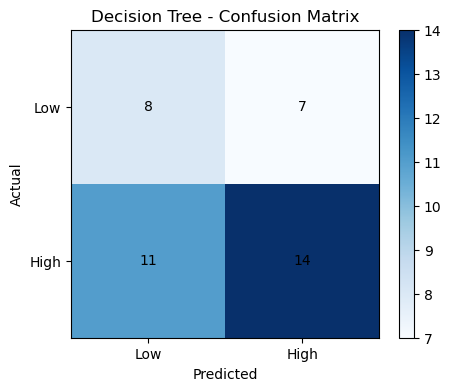

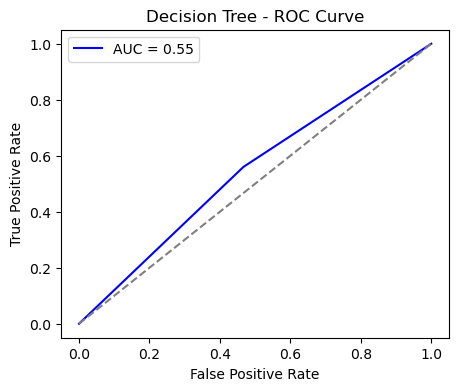

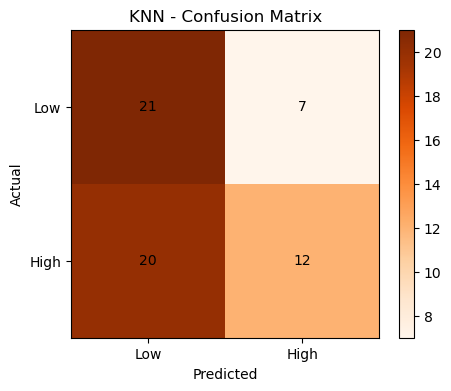

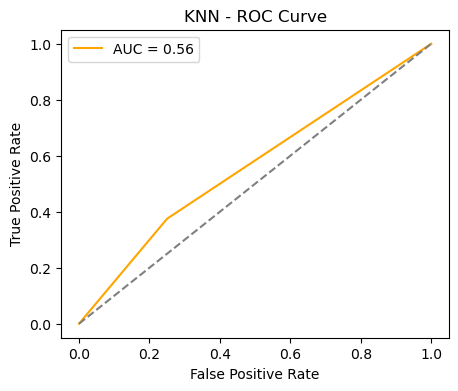

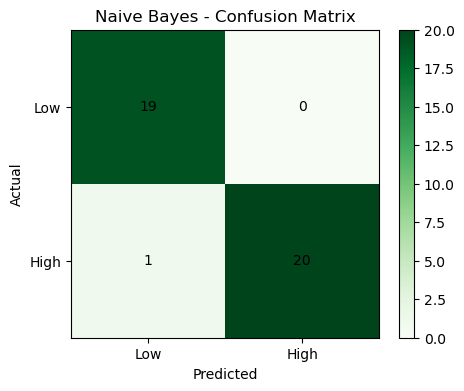

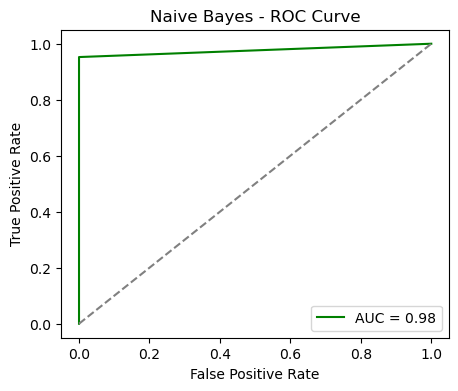

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# -------------------- Decision Tree --------------------
cm_dt = confusion_matrix(b_test, Result)

plt.figure(figsize=(5,4))
plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Decision Tree - Confusion Matrix")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Low', 'High'])
plt.yticks(tick_marks, ['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_dt[i, j], ha='center', va='center', color='black')

plt.show()

fpr_dt, tpr_dt, _ = roc_curve(b_test, Result)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(5,4))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Decision Tree - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# -------------------- KNN --------------------
cm_knn = confusion_matrix(Y_test, pred)

plt.figure(figsize=(5,4))
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title("KNN - Confusion Matrix")
plt.colorbar()
plt.xticks(tick_marks, ['Low', 'High'])
plt.yticks(tick_marks, ['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_knn[i, j], ha='center', va='center', color='black')

plt.show()

fpr_knn, tpr_knn, _ = roc_curve(Y_test, pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(5,4))
plt.plot(fpr_knn, tpr_knn, color='orange', label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("KNN - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# -------------------- Naive Bayes --------------------
cm_nb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Naive Bayes - Confusion Matrix")
plt.colorbar()
plt.xticks(tick_marks, ['Low', 'High'])
plt.yticks(tick_marks, ['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm_nb[i, j], ha='center', va='center', color='black')

plt.show()

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(5,4))
plt.plot(fpr_nb, tpr_nb, color='green', label=f'AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Naive Bayes - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In conclusion, this study aimed to predict food delivery status (fast or delayed) based on various factors using three machine learning models—Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree Classifier. After preprocessing and feature scaling, all models were trained and evaluated using accuracy, precision, recall, and F1-score. Among them, Naive Bayes achieved the highest performance with 97.5% accuracy, 1.0 precision, and 0.95 recall, indicating excellent predictive capability and reliability for this dataset. The Decision Tree showed moderate accuracy (55%) and was prone to overfitting, while KNN performed the weakest (47% accuracy) due to its sensitivity to feature scaling and limited input variables. Overall, the Naive Bayes Classifier is recommended as the best-performing model for predicting food delivery times, given its balance of simplicity, speed, and high accuracy, making it well-suited for practical deployment in delivery optimization systems.